In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
cadastros = pd.read_csv(r'https://github.com/alura-tech/alura-tech-pos-data-science-credit-scoring-streamlit/blob/main/dados/clientes_cadastrados.csv?raw=True')

In [85]:
cadastros.head(3)

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0


In [86]:
# tamanho do df
cadastros.shape

(438557, 18)

In [87]:
# verificando dados nulos
id_rep = cadastros[cadastros['ID_Cliente'].duplicated(keep=False)]
df_cadastro = cadastros.drop(id_rep.index)

In [88]:
# verificando dados nulos
df_cadastro.isnull().sum()

ID_Cliente                    0
Genero                        0
Tem_carro                     0
Tem_casa_propria              0
Qtd_filhos                    0
Rendimento_anual              0
Categoria_de_renda            0
Grau_escolaridade             0
Estado_civil                  0
Moradia                       0
Idade                         0
Anos_empregado                0
Tem_celular                   0
Tem_telefone_trabalho         0
Tem_telefone_fixo             0
Tem_email                     0
Ocupacao                 134177
Tamanho_familia               0
dtype: int64

In [89]:
# verificando os dados na coluna que tem valores vazios
df_cadastro['Ocupacao'].unique()

array([nan, 'Segurança', 'Vendas', 'Contabilidade', 'Construção Civil',
       'Gerência', 'Motorista', 'Equipe principal', 'Alta tecnologia',
       'Limpeza', 'Serviço privado', 'Cozinha', 'Baixa qualificação',
       'Medicina', 'Secretariado', 'Garçom', 'RH', 'Corretor imobiliário',
       'TI'], dtype=object)

In [90]:
# substituindo os vazios por 'outros'
df_cadastro['Ocupacao'].fillna(value='Outros', inplace=True)

In [91]:
# verificando quantidade de valores distintos por coluna
df_cadastro.nunique()

ID_Cliente               438463
Genero                        2
Tem_carro                     2
Tem_casa_propria              2
Qtd_filhos                   12
Rendimento_anual            866
Categoria_de_renda            5
Grau_escolaridade             5
Estado_civil                  5
Moradia                       6
Idade                     16379
Anos_empregado             9406
Tem_celular                   1
Tem_telefone_trabalho         2
Tem_telefone_fixo             2
Tem_email                     2
Ocupacao                     19
Tamanho_familia              13
dtype: int64

In [92]:
# tratamento de colunas
df_cadastro = df_cadastro.assign(
                                Tem_carro = np.where(df_cadastro['Tem_carro'] == 'Y', 1, 0),
                                Tem_casa_propria = np.where(df_cadastro['Tem_casa_propria'] == 'Y', 1, 0),
                                Idade = - (df_cadastro['Idade']/365.2425),
                                Anos_empregado=lambda x: np.where(-(x['Anos_empregado'] / 365.2425) < 0,
                                                                  0, 
                                                                  -(x['Anos_empregado'] / 365.2425))
                                                                  )

In [93]:
# removendo colunas
df_cadastro.drop(columns=['Genero', 'Tem_celular'], inplace=True)

In [94]:
# verificando tipo de dados
df_cadastro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  int32  
 2   Tem_casa_propria       438463 non-null  int32  
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  float64
 10  Anos_empregado         438463 non-null  float64
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-null  o

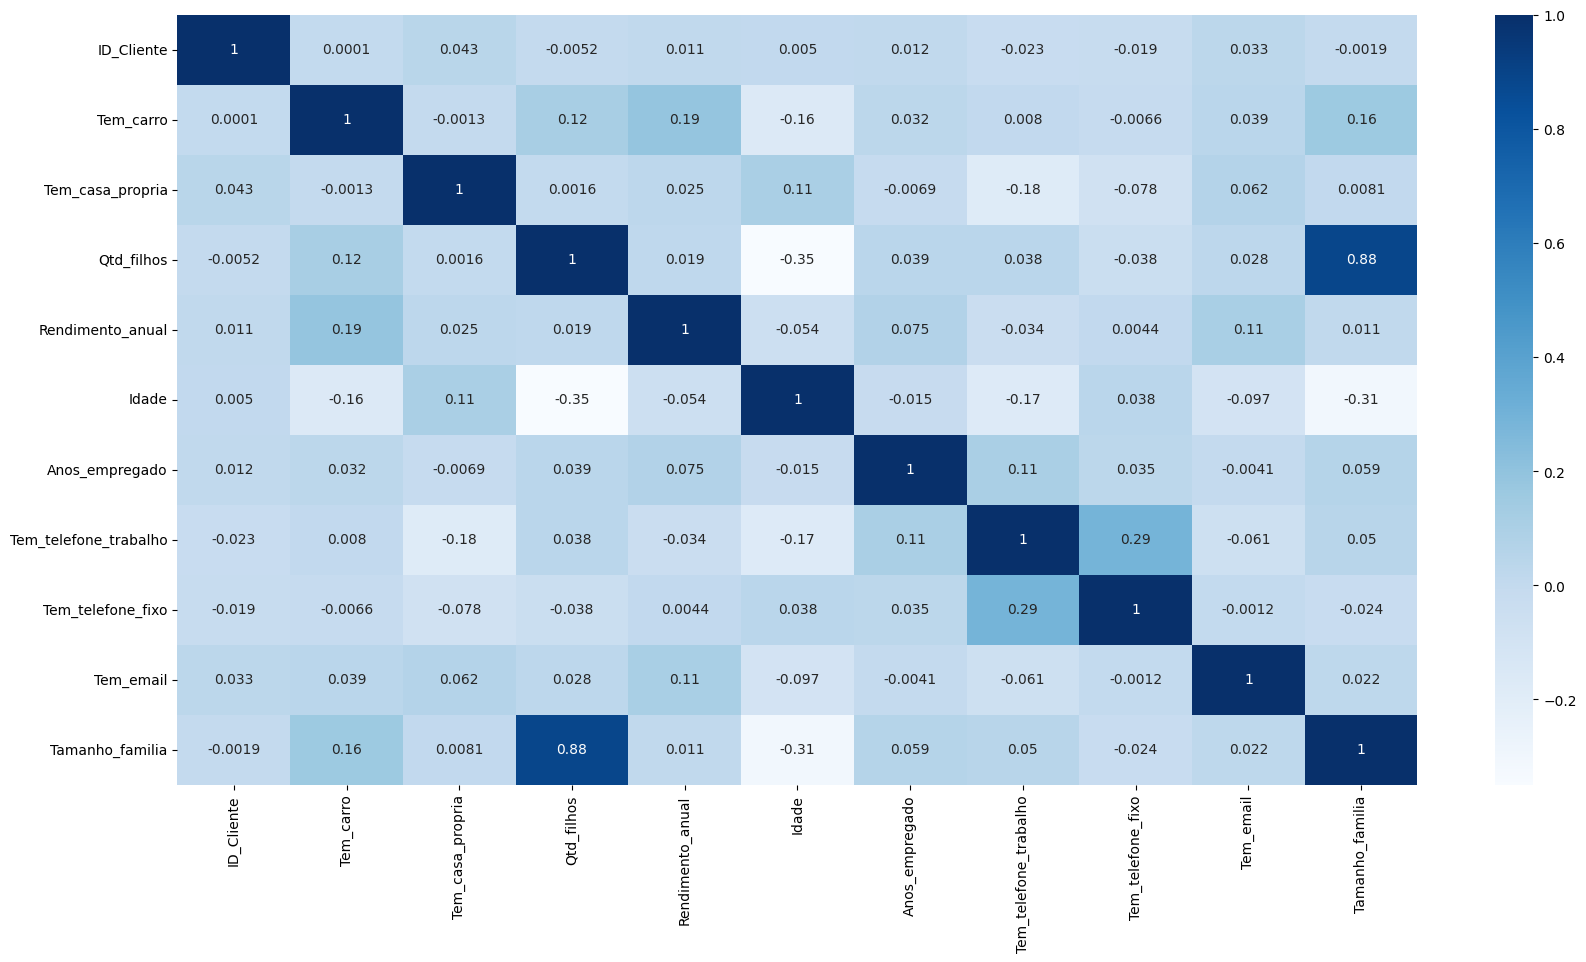

In [95]:
# analisando as correlacoes
numeric_df = df_cadastro.select_dtypes(include=['number'])
corr = numeric_df.corr()

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(corr, cmap='Blues', annot=True)

In [96]:
# removendo colunas
df_cadastro.drop(columns=['Qtd_filhos'], inplace=True)

In [98]:
df_cadastro.columns

Index(['ID_Cliente', 'Tem_carro', 'Tem_casa_propria', 'Rendimento_anual',
       'Categoria_de_renda', 'Grau_escolaridade', 'Estado_civil', 'Moradia',
       'Idade', 'Anos_empregado', 'Tem_telefone_trabalho', 'Tem_telefone_fixo',
       'Tem_email', 'Ocupacao', 'Tamanho_familia'],
      dtype='object')

In [100]:
# reeordenando as colunas
df_cadastro = df_cadastro[['ID_Cliente', 'Tem_carro', 'Tem_casa_propria', 'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
                           'Tamanho_familia', 'Rendimento_anual', 'Idade', 'Anos_empregado', 'Categoria_de_renda', 'Grau_escolaridade', 'Estado_civil', 'Moradia', 'Ocupacao']]

<Axes: xlabel='Categoria_de_renda'>

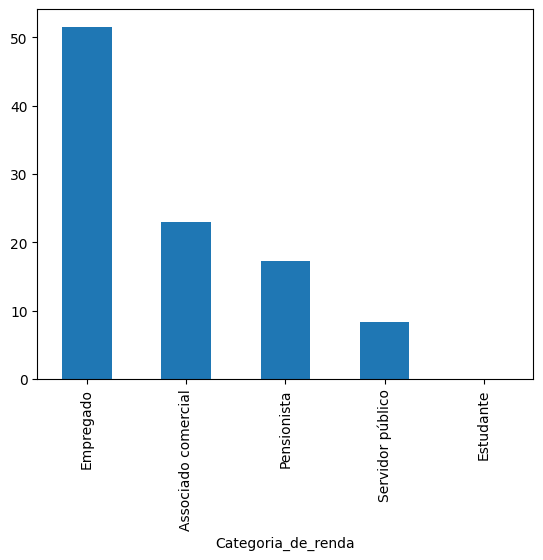

In [105]:
(df_cadastro.Categoria_de_renda.value_counts(normalize=True)*100).plot(kind='bar', )